In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats

## Zscores / Standardisation


When working with data, sometimes it's necessary to work with variables that are not in the same scales - eg. weight of an elephant (thousands of kilogram) vs. weight of an ant (thousandths of a kilogram).

Elephant: 6,000 kg = 6,000,000 grams = 6,000,000,000 milligram

Ant: 6 milligrams = 0.006 grams = 0.000006 kilograms

In [5]:
# Generate data and create dataframe with variable animal (ants / elephants) and weights (in kg)

ants_weight = np.random.normal(loc = 0.000006, scale = 0.000003, size = 1000)
elephants_weight = np.random.normal(loc = 6000, scale = 3000, size = 1000)

ants = np.tile('ants', 1000)
elephants = np.tile('elephants', 1000)

df = pd.DataFrame({'animal': np.concatenate((ants, elephants)), 'weights': np.concatenate((ants_weight, elephants_weight))})
df.tail()

,animal,weights
1995,elephants,5850.959817
1996,elephants,6970.087769
1997,elephants,11828.962842
1998,elephants,3446.506098
1999,elephants,5899.557967


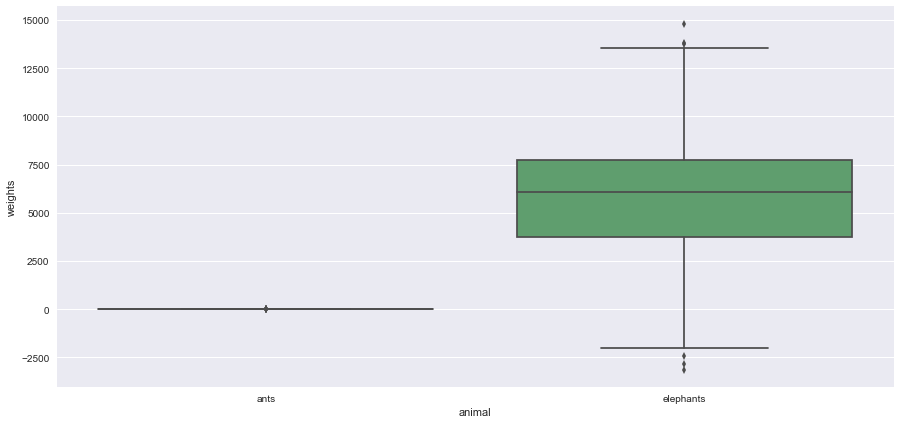

In [6]:
# Barplot weight of ants and weight of elephants
plt.figure(figsize = [15,7])
sns.boxplot(x = 'animal', y = 'weights', data = df);

As can be seen, the two simply cannot be viewed on the same scale. How could be view them both on the same plot (put them on an equal playing field)? Enter the Zscore.

## $$ Zscore = \frac{X - \bar{X}}{s_{X}} $$

X - Observation

$\bar{X}$ - Mean of variable
$s_{X}$ - Standard Deviation of variable

A Zscore transforms data so it has a mean of 0 and a standard deviation of 1. Each observation is now a measure of how far from the variable's mean it is and in which direction (greater than the mean, smaller than the mean).

**0: Equal to the mean**

**+n: Greater than the mean**

**-n: Less than the mean**

We'll create a new variable z_weights that will contain the zscored weights.

In [8]:
#Make new variable zero filled
df['z_weights'] = 0

#Split ants specific data out
ants = df[df['animal'] == 'ants']
#Apply z-score
ants['z_weight'] = (ants['weights'] - ants['weights'].mean()) / ants['weights'].std()

#Split elephants specific data out
elephants = df[df['animal'] == 'elephants']
#Apply z-score
elephants['z_weight'] = (elephants['weights'] - elephants['weights'].mean()) / elephants['weights'].std()

#Populate z_weights with concatenated zscored data
df['z_weights'] = np.concatenate((ants['z_weight'], elephants['z_weight']))

/home/ga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ga/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [9]:
#Show first and last 5 values
df['z_weights'].iloc[np.r_[0:5, -5:0]]

0      -0.847515
1      -0.426012
2      -2.776102
3       0.513764
4      -0.202329
1995    0.000465
1996    0.376189
1997    2.007455
1998   -0.806780
1999    0.016781
Name: z_weights, dtype: float64

In [124]:
df.groupby(by = 'animal').agg(['mean', 'std', 'min', 'max'])

weights                                             z_weights  \
                  mean          std          min           max          mean   
animal                                                                         
ants          0.000006     0.000003    -0.000002      0.000015 -3.933021e-15   
elephants  5992.976228  2936.217152 -4801.585841  16474.615408  2.000622e-16   

                                    
           std       min       max  
animal                              
ants       1.0 -2.816495  2.905905  
elephants  1.0 -3.676350  3.569777

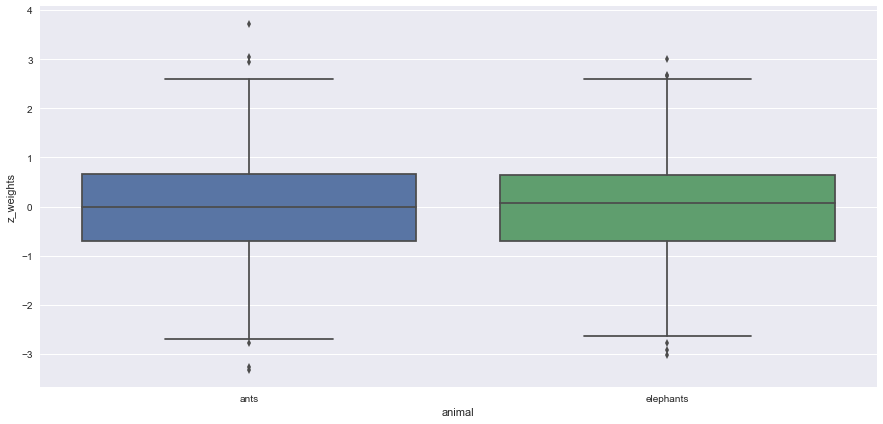

In [10]:
plt.figure(figsize = [15,7])
sns.boxplot(x = 'animal', y = 'z_weights', data = df);

## The values of ants and elephants are on the same scale. Has the shape (distributions) of the data changed?

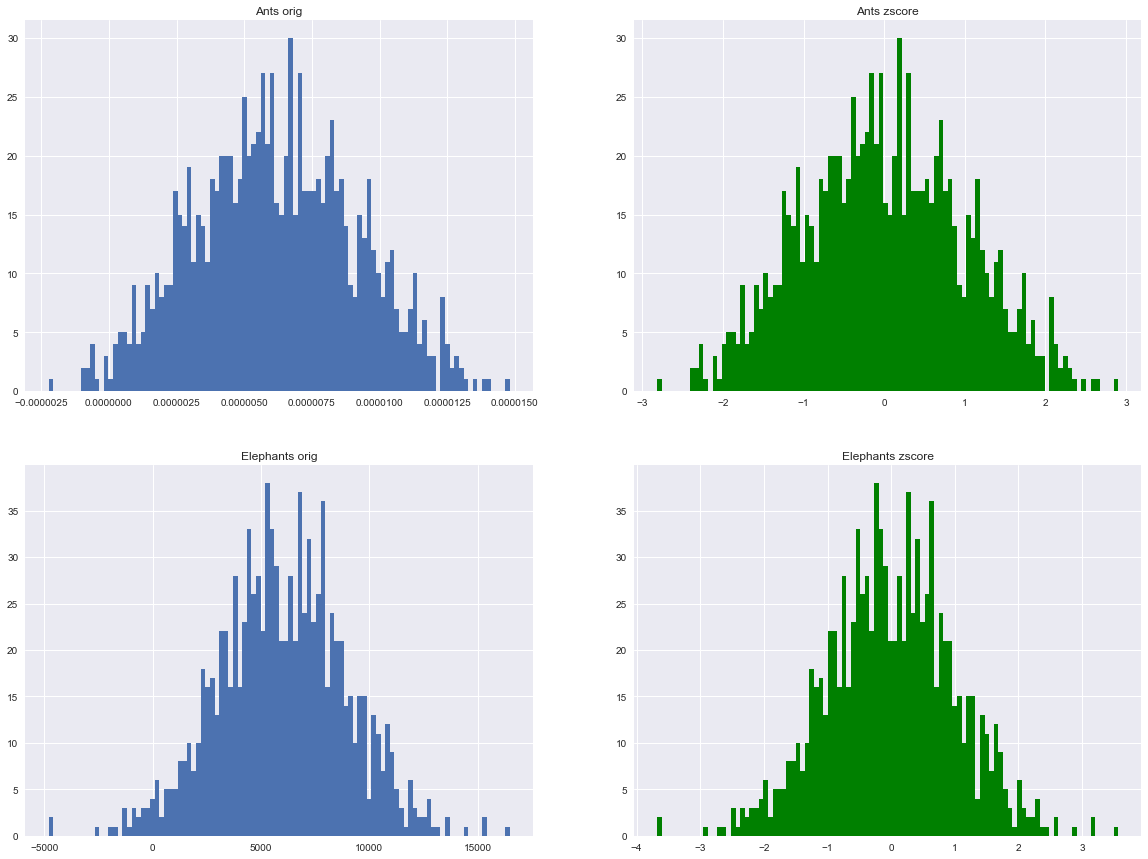

In [177]:
fig = plt.figure(figsize = [20,15]);
plt.subplot(221); plt.hist(df[df['animal'] == 'ants']['weights'], bins = 100);
plt.title('Ants orig');
plt.subplot(222); plt.hist(df[df['animal'] == 'ants']['z_weights'], bins = 100, color = 'g');
plt.title('Ants zscore');
plt.subplot(223); plt.hist(df[df['animal'] == 'elephants']['weights'], bins = 100);
plt.title('Elephants orig');
plt.subplot(224); plt.hist(df[df['animal'] == 'elephants']['z_weights'], bins = 100, color = 'g');
plt.title('Elephants zscore');

# Lets get silly

Suppose we created an embiggening device and grew every ant to the size of elephant (or even that we made an ensmallening device and shrunk all elephants to the size of an ant...).

We collect a sample of ants and a sample of elephants to answer the age old question:

Is there a difference between giant ant weights and normal elephant weight?

H0: There will be no difference in weights between ants and elephants

H1: There **WILL** be a difference in weights between ants and elephants

In [12]:
t, p = stats.ttest_ind(df[df['animal'] == 'ants']['weights'], df[df['animal'] == 'elephants']['weights'])

print('The p value is {}\nIs there a difference between the weights of giant ants and normal elephants?'.format(p))

The p value is 0.0
Is there a difference between the weights of giant ants and normal elephants?


## Summary:

1. Zscoring allows you to compare variables that on different scales / orders of magnitude.
2. Zscores transform the data to have a mean of 0 and a std of 1
3. Each observation is a transformed to how far it is from the group mean
4. Transforming the data changes the values, but **NOT** the distribution
5. It allows you to do some strange analyses...